## Lecture Notes

We want to estimate the random variable X from a noisy oberserved variable Y

$$
\hat{\mathbf{x}}=A\mathbf{y}+\mathbf{b}
$$

Such that the error $\mathbb{E}[||\mathbf{x}-\mathbf{\hat{x}}||]$ is minimized

By defining the zero mean vectors $\mathbf{\tilde{x}}=x-\mu_x$ and $\mathbf{\tilde{y}}=y-\mu_y$ we rewrite

$$
\hat{\mathbf{x}}=A(\mathbf{\tilde{y}}+\mu_y)+\mathbf{b}=A\mathbf{\tilde{y}}+(A\mu_y+\mathbf{b})
$$

To preserve the mean we set $A\mu_y+\mathbf{b}=\mu_x$

$$
\hat{\mathbf{x}}=A\mathbf{\tilde{y}}+\mu_x
$$

And we find the optimal $\mathbf{b}=\mu_x-A\mu_y$

Then we can work only on the $A$ term when optimizing.

$$
\mathbb{E}[||\mathbf{\tilde{x}} - A\mathbf{\tilde{y}}||]=\mathbf{E}[(\mathbf{\tilde{x}} - A\mathbf{\tilde{y}})^T(\mathbf{\tilde{x}} - A\mathbf{\tilde{y}})]
$$

This we can differentiate with with respect to $A$ and set it to zero which gives us

$$
A=C_{xy}C_{yy}^{-1}
$$

Where $C_{xy}$ and $C_{yy}$ are the cross and auto correlation matrices respectively.

This works for any joint distribution of $X$ and $Y$ and only requires the first two moments of the distributions, mean and covariance.

$$
\mathbf{\tilde{x}}=\mu_x+C_{xy}C_{yy}^{-1}(y-\mu_y)
$$

### Special case for additive Gaussian noise(Wiener filter)

If we assume the model $\mathbb{y}=H\mathbb{x}+n$ where $n$ is zero mean noise independent of x with covariance $C_{nn}$

Then by linear transformation we can find the cross covariance defined by the linear transformation 
$$
C_{xy}=C_{xx}H^T
$$

And the autocovariance(See lecture slides for proofs)

$$
C_{yy}=HC_{xx}H^T+C_{nn}
$$

Since we perform a linear transformation

We can plug this into the original solution

$$
\mathbf{\tilde{x}}=\mu_x+C_{xx}H^T(HC_{xx}H^T+C_{nn})^{-1}(y-\mu_y)
$$

### MSE For linear Minimum Mean Square Estimators

The MSE is defined as 

$$
\mathbb{E}[(x-\tilde{x})^2]
$$

After minimizing the MSE and solving for the estimation parameters, the theoretical minimum MSE is obtained by

$$
MSE(\tilde{x})=C_{xx}-C_{xy}C_{xx}^{-1}C_{xy}
$$

For the scalar case, this reduces to

$$
MSE(\tilde{x})=Var(x)-\frac{Cov(x,y)^2}{Var(y)}
$$

## Exercises

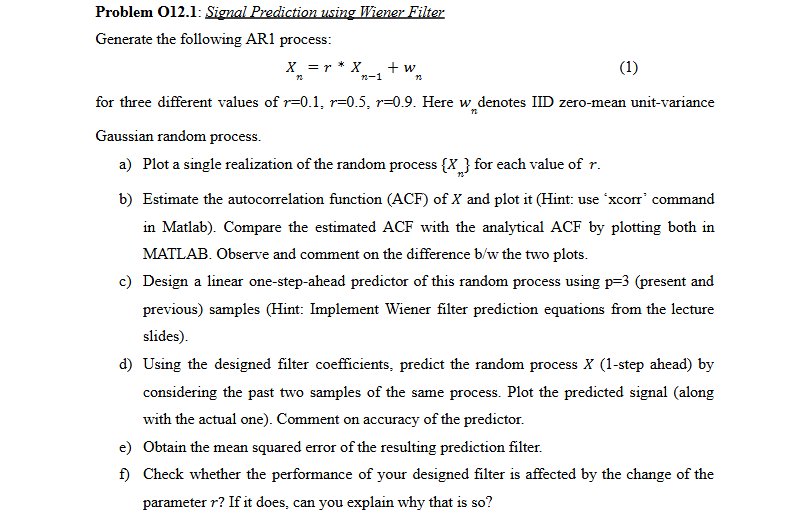

In [1]:
def ar_one(w, theta):

    N = len(w)

    x = np.zeros_like(w)
    
    x[0] = w[0]
    for i in range(1, N):
        x[i] = theta*x[i-1]+w[i]

    return x

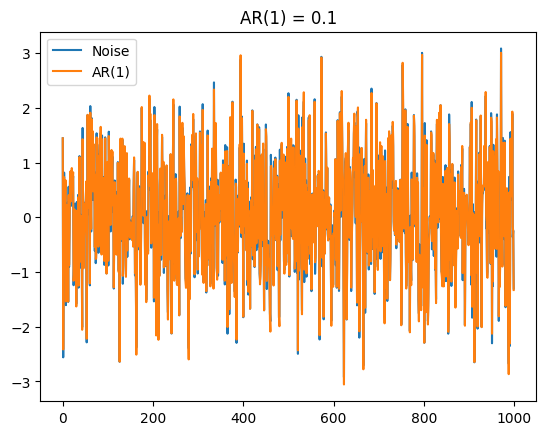

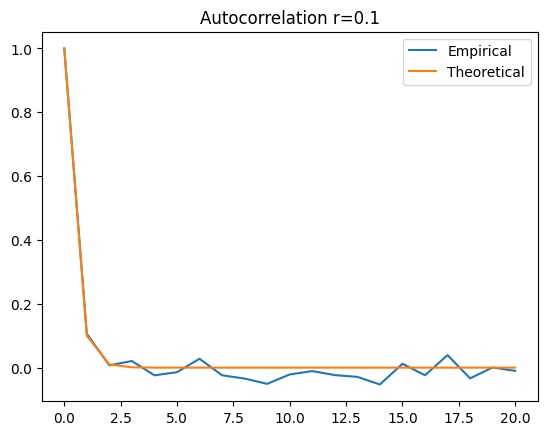

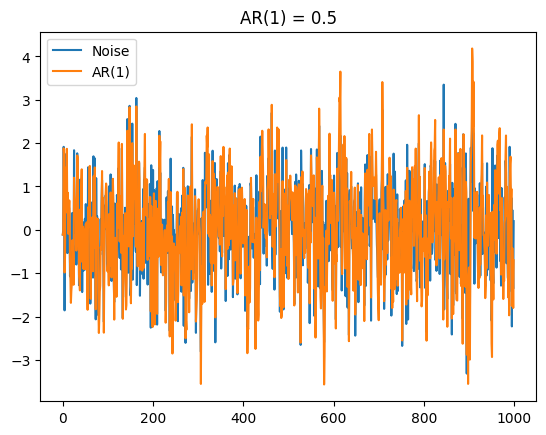

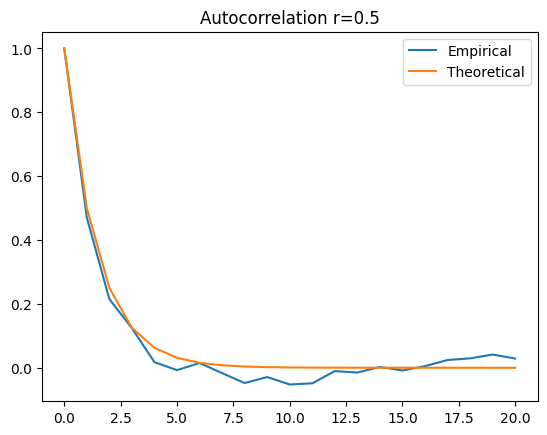

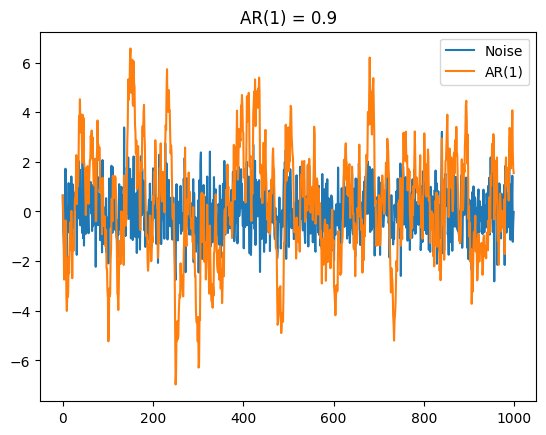

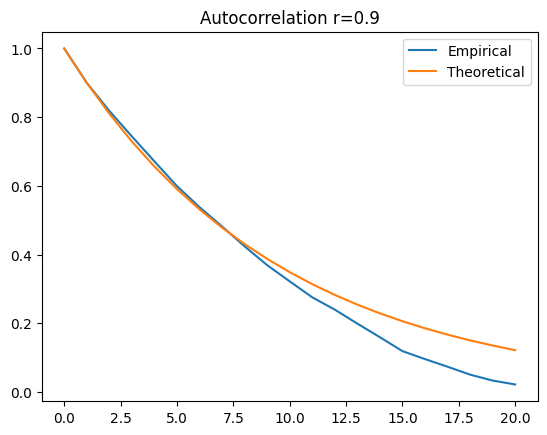

In [2]:
# a and b)
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

N = 1000
nlags = 20
sigma_w = 1

w_ = []
x_ = []

r_ = [0.1, 0.5, 0.9]
for r in r_:
    w = np.random.normal(0, 1, N)

    x = ar_one(w, r)

    w_ += [w]
    x_ += [x]
    
    acorr = acf(x, nlags=nlags)
    r_0 = sigma_w**2/(1-r**2)
    acorr_theoretical = [r_0*r**np.abs(k) for k in range(nlags+1)]
    acorr_theoretical = [a/acorr_theoretical[0] for a in acorr_theoretical]

    
    plt.figure()
    plt.plot(w, label="Noise")
    plt.plot(x, label="AR(1)")
    plt.title(f"AR(1) = {r}")
    plt.legend()

    plt.figure()
    plt.plot(acorr, label="Empirical")
    plt.plot(acorr_theoretical, label="Theoretical")
    plt.title(f"Autocorrelation r={r}")
    plt.legend()

We want to estimate some signal $x$ from observations $y$

$$
\hat{x_n}=\mathbf{h}^T\mathbf{y_n}
$$

From LMMSE we know that 

$$
H=C_{xy}C_{yy}^{-1}
$$

Where the covariance matrices becomes correlation matrices

$$
\mathbf{h}=R_{yy}^{-1}\mathbf{r}_{xy}
$$

Because we estimate a scalar from a vector, we take the first row of the cross covariance matrix instead of the whole matrix.

We can estimate both present(denoising), future(prediction) and previous(smoothing) values using the Wiener filter. This comes down to how the cross correlation vector is defined

$\tau=0$ is denoising, $\tau>0$ is prediction and $\tau < 0$ is smoothing

If we define

$$
\hat{x_{n+\tau}}=\mathbf{h}^T\mathbf{y_n}
$$

Then the cross correlation becomes:

$$
r_{xy}(k)=\mathbb{E}[x_{n+\tau})(y_{n-k})]
$$

If $P=3$

$$
R_{yy}=
\begin{bmatrix}
r_{yy}(0) & r_{yy}(1) & r_{yy}(2) \\
r_{yy}(1) & r_{yy}(0) & r_{yy}(1) \\
r_{yy}(2) & r_{yy}(1) & r_{yy}(0) 
\end{bmatrix}
$$

$$
R_{xy}=
\begin{bmatrix}
r_{xy}(\tau)\\
r_{xy}(\tau+1)\\
r_{xy}(\tau+2)
\end{bmatrix}
$$

Since we are trying to predict future values of $x_n$ from past values of $y_{n-k}$, for $k=0,..,N$ we are essentialy setting $x_n=y_n$.
Hence, the cross correlation vector $r_{xy}=r_{yy}$ which we can compute directly from the observed signal.

Given the denoising problem of recovering the signal $X_n$ from

$$
X_n=Z_n+E_n
$$ 

Where $E_n$ is gaussian with $\sigma_e^2$

$$
Z_n=rZ_{n-1}+W_n
$$
Where $W_n$ is gaussian with $\sigma_w^2$

We compute the autocorrelation

$$
Cov_x(k)=\mathbb{E}[X_nX_{n-k}]=\mathbb{E}[(Z_n+E_n)(Z_{n-k}+E_{n-k})] 
$$

For $k=0$ $Cov_x(k)=Cov_z(0)+\sigma_e^2$ and $k\neq 0$ $Cov_x(k)=Cov_z(k)$

The cross correlation becomes

$$
Cov_{xz}(k)=\mathbb{E}[X_nZ_{n-k}]=\mathbb{E}[(Z_n+E_n)Z_{n-k}]=\mathbb{E}[Z_nZ_{n-k}]+0=Cov_z(k)
$$

Since $Z_{n-k}$ and $E_n$ are always independent of each other.

Hence, we will need to subtract the noise power from the estimated autocovariance

$r_{xy}[0]=r_{xx}-\sigma_e^2=Cov_z(0)-\sigma_e^2$ and 

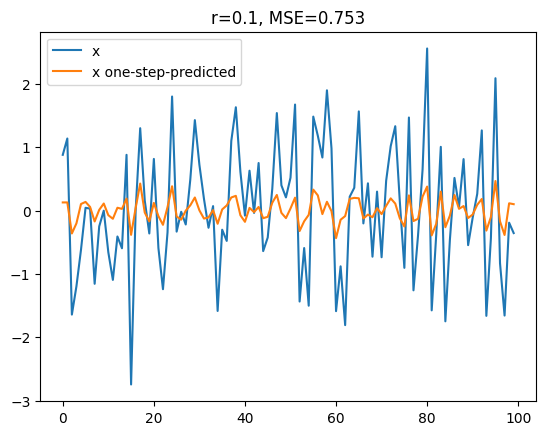

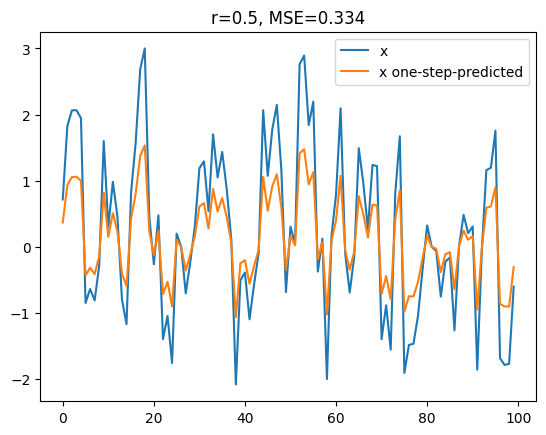

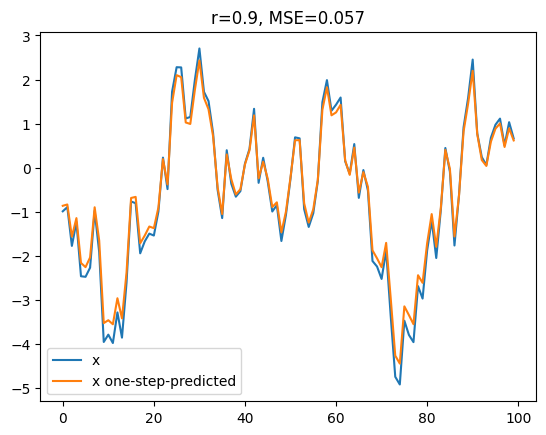

In [3]:
# c, d, e and f)
from statsmodels.tsa.stattools import acf

P = 3
tau = 1

r_ = [0.1, 0.5, 0.9]
for r in r_:
    w = np.random.normal(0, 1, N)

    x = ar_one(w, r)

    acf_values = acf(x, nlags=P+tau)
    
    cov = np.zeros((P,P))
    cross = np.zeros(P)
    for i in range(P):
        cross[i] = acf_values[i+tau]
        for j in range(P):
            cov[i, j] = acf_values[np.abs(i-j)]

    h = np.linalg.inv(cov) @ cross

    x_hat = np.convolve(x, h, mode='full')[:-(P-1)]

    e = x-x_hat
    mse = np.mean(e**2)

    plot_num = 100
    
    plt.figure()
    plt.plot(x[:plot_num], label="x")
    plt.plot(x_hat[:plot_num], label="x one-step-predicted")
    #plt.plot(e, label="error")
    plt.legend()
    plt.title(f"r={r}, MSE={mse:.3f}")

    

As r grows larger, a better prediction performance is expected, since the process is less random.

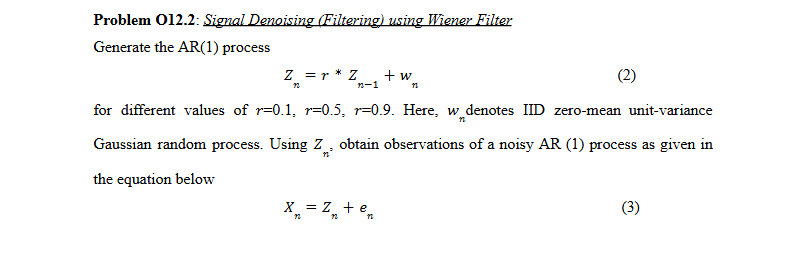
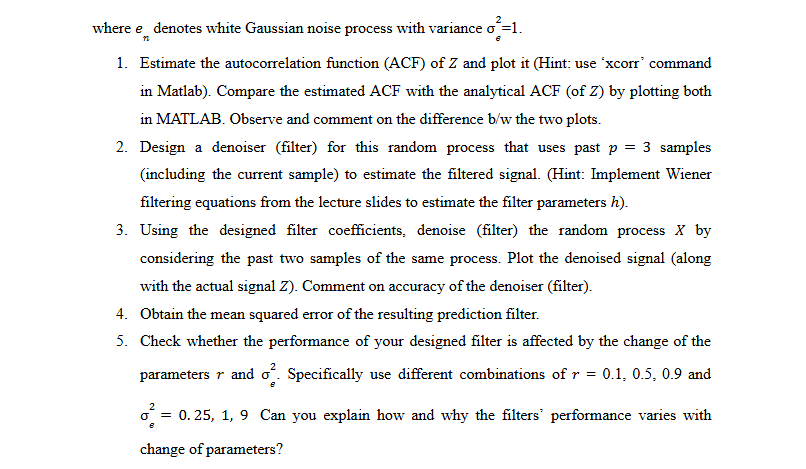

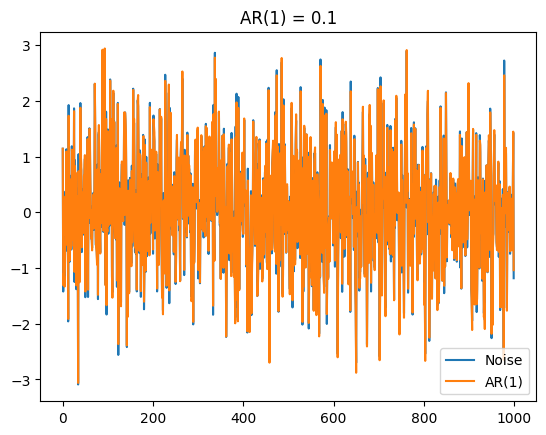

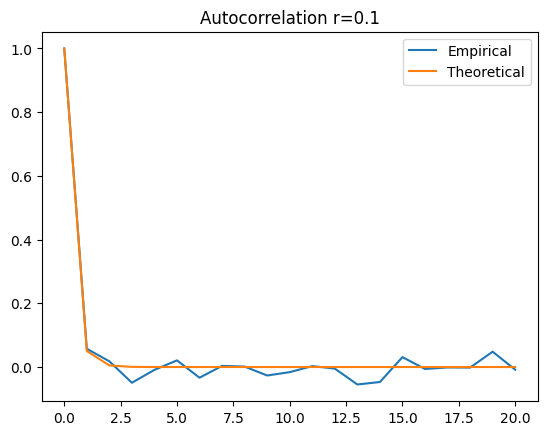

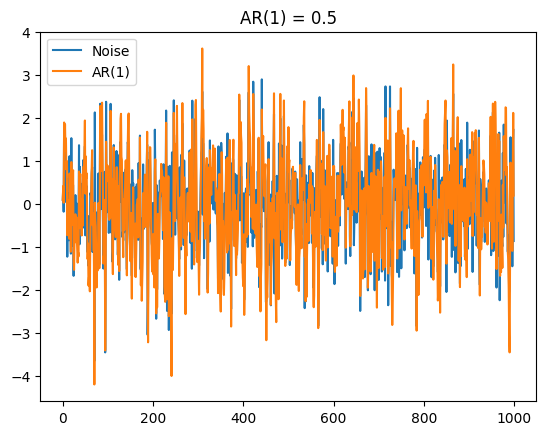

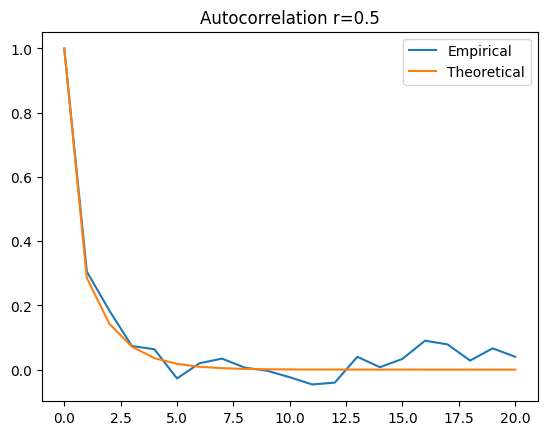

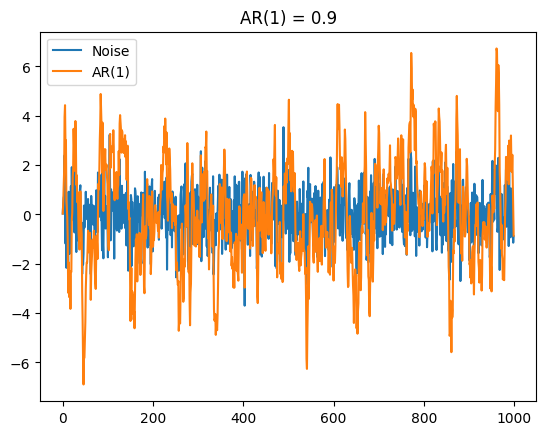

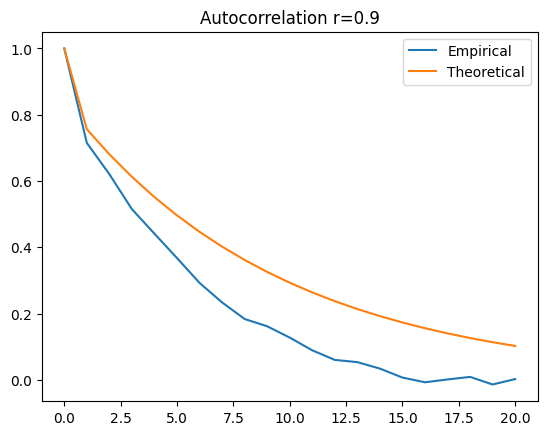

In [4]:
# 1)
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

N = 1000
nlags = 20
sigma_w = 1
sigma_e = 1
w_ = []
x_ = []

r_ = [0.1, 0.5, 0.9]
for r in r_:
    w = np.random.normal(0, 1, N)
    e = np.random.normal(0, 1, N)
    x = ar_one(w, r)

    z = x + e

    w_ += [w]
    x_ += [x]
    
    acorr = acf(z, nlags=nlags)

    r_0 = sigma_w**2/(1-r**2)
    acorr_theoretical = [(r_0+sigma_e**2) if k==0 else r_0*r**np.abs(k) for k in range(nlags+1)]
    acorr_theoretical = [a/acorr_theoretical[0] for a in acorr_theoretical]

    
    plt.figure()
    plt.plot(w, label="Noise")
    plt.plot(x, label="AR(1)")
    plt.title(f"AR(1) = {r}")
    plt.legend()

    plt.figure()
    plt.plot(acorr, label="Empirical")
    plt.plot(acorr_theoretical, label="Theoretical")
    plt.title(f"Autocorrelation r={r}")
    plt.legend()

r=0.10, sigma_e=9.00, MSE=0.199, MSE Expected=0.2004008016032064
r=0.50, sigma_e=9.00, MSE=0.216, MSE Expected=0.21052631578947367
r=0.90, sigma_e=9.00, MSE=0.239, MSE Expected=0.23866348448687358
r=0.10, sigma_e=9.00, MSE=0.525, MSE Expected=0.5025125628140704
r=0.50, sigma_e=9.00, MSE=0.503, MSE Expected=0.5714285714285713
r=0.90, sigma_e=9.00, MSE=0.599, MSE Expected=0.8403361344537821
r=0.10, sigma_e=9.00, MSE=0.906, MSE Expected=0.9081735620585268
r=0.50, sigma_e=9.00, MSE=1.175, MSE Expected=1.161290322580645
r=0.90, sigma_e=9.00, MSE=2.378, MSE Expected=3.3210332103321036


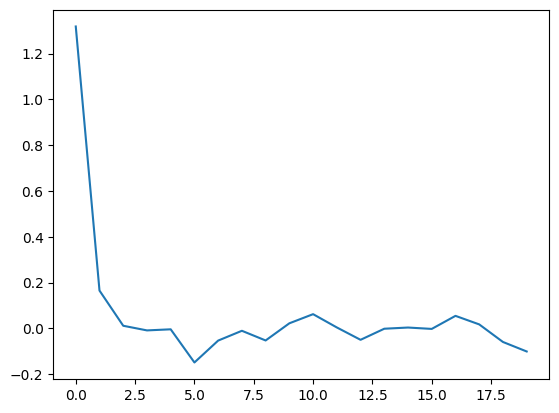

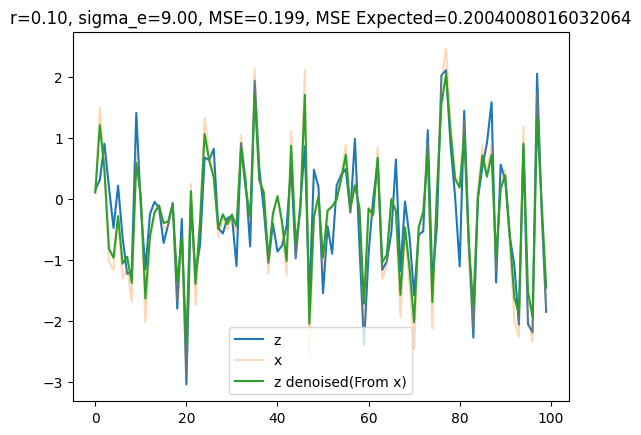

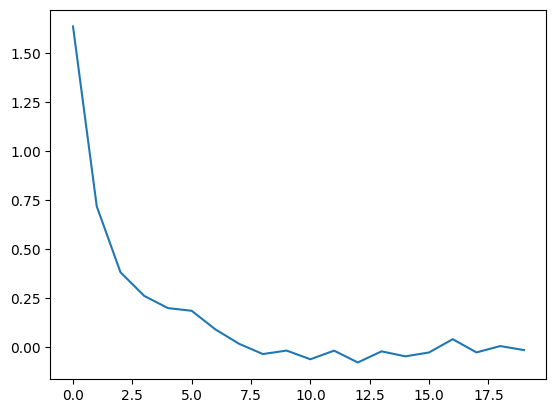

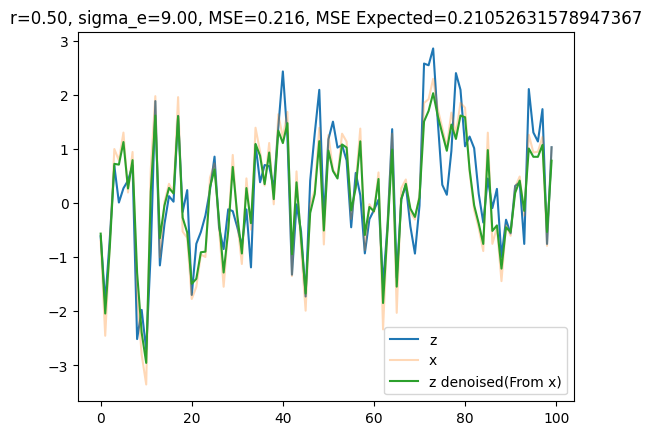

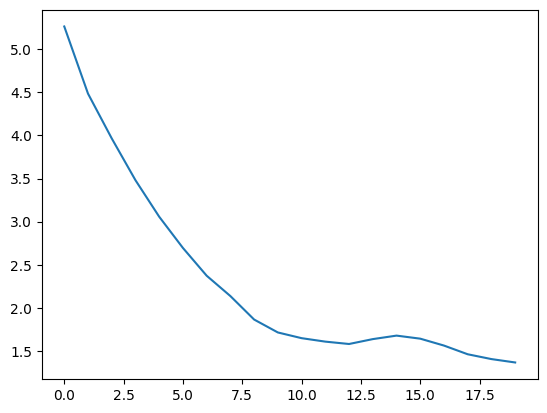

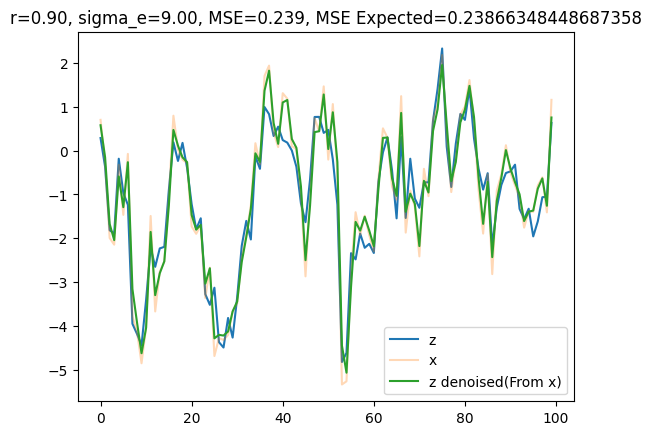

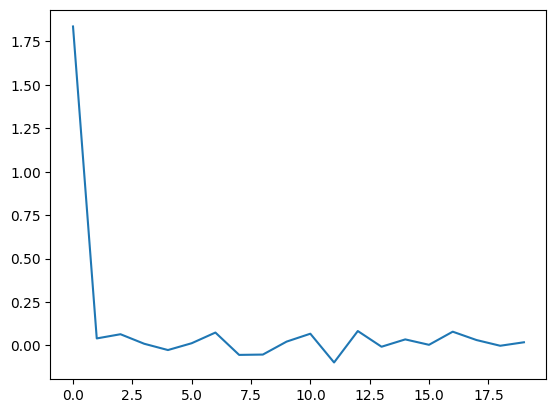

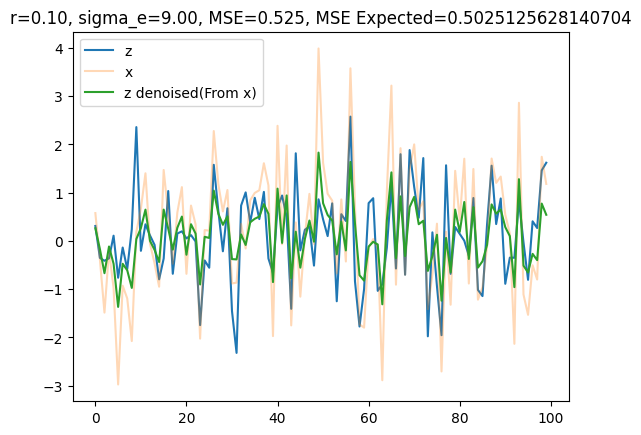

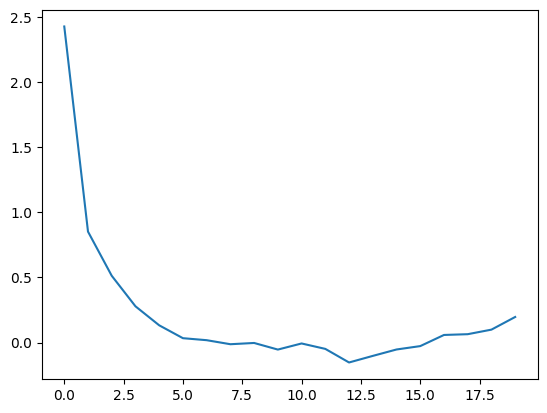

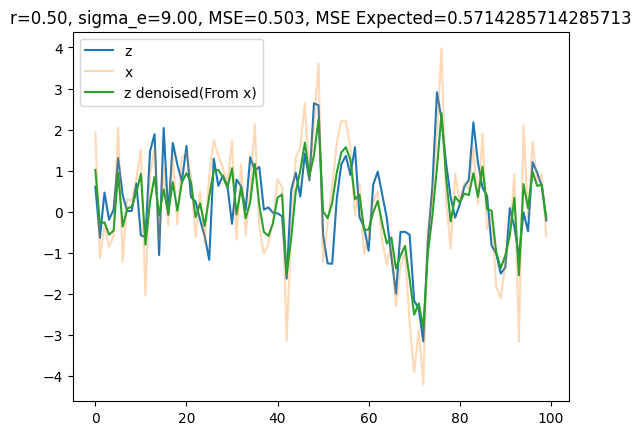

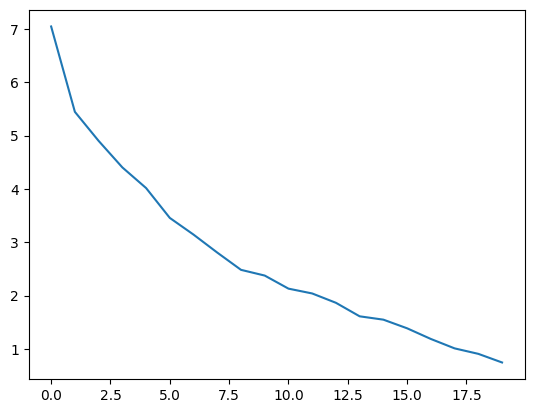

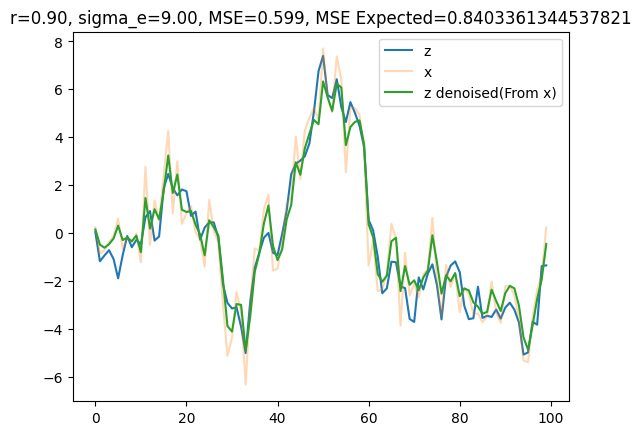

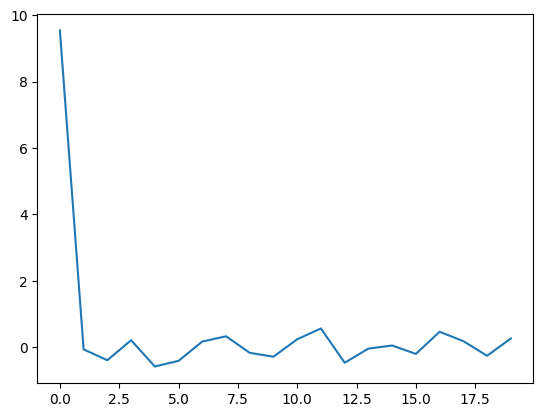

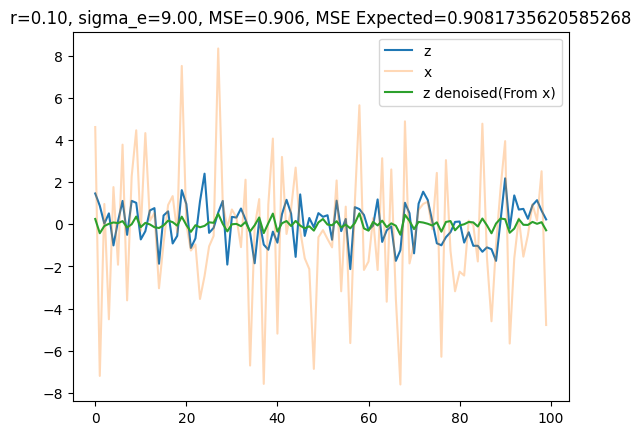

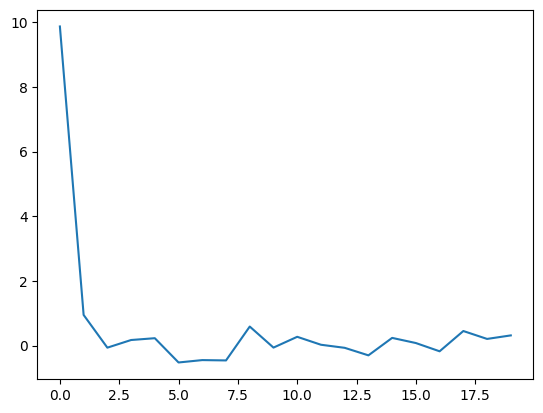

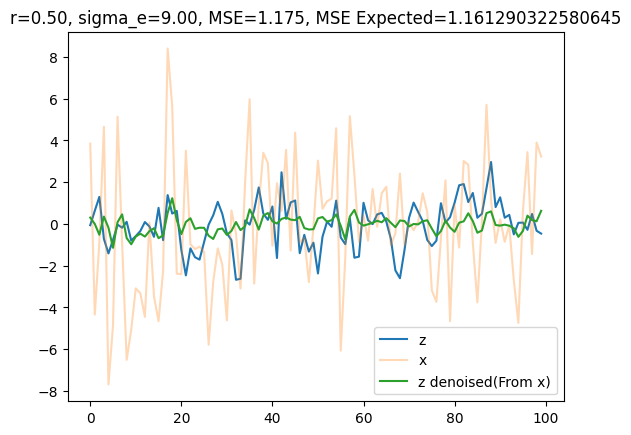

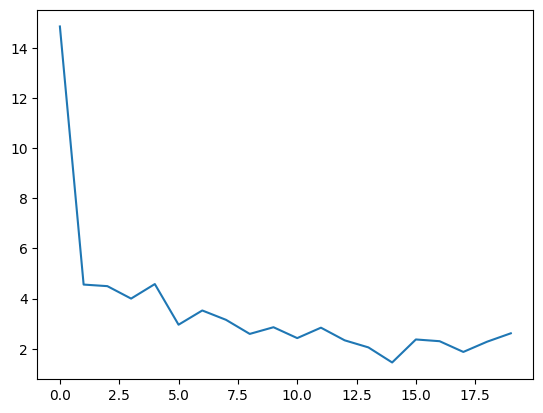

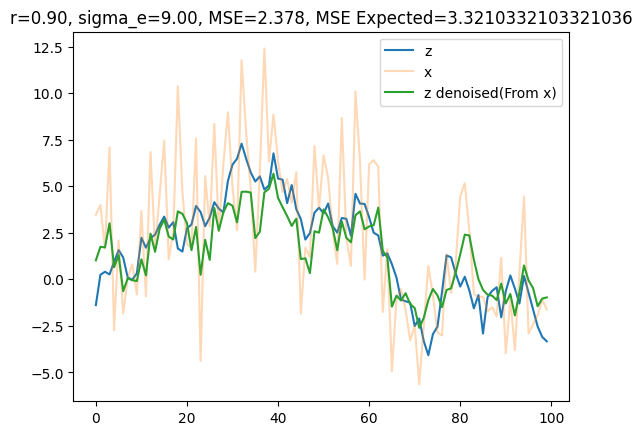

In [46]:
# 2, 3, 4 and 5)
from statsmodels.tsa.stattools import acf

N = 1000
P = 3
tau = 0
sigma_w = 1
r_ = [0.1, 0.5, 0.9]
sigma_e_sqrt_ = [0.25, 1.0, 9.0]
for sigma_e_sqrt in sigma_e_:    
    for r in r_:
    
        w = np.random.normal(0, 1, N)
        e = np.random.normal(0, np.sqrt(sigma_e_sqrt), N)
        z = ar_one(w, r)
        x = z + e
        
        r_0 = sigma_w**2/(1-r**2)

        #acorr = acf(x, nlags=P+tau)
        acorr = np.correlate(x, x, mode='full')
        acorr = acorr[N-1:N-1+20] / N
        
        plt.figure()
        plt.plot(acorr)
        
        # We compute the cross an correlations analytically
        rxx = np.zeros((P,P))
        rss = np.zeros(P)
        for i in range(P):
            
            # For the cross correlation, the noise term cancels out
            rss[i] = acorr[i+tau]#r_0*r**np.abs(i+tau)
            if i+tau == 0:
                rss[i+tau] -= sigma_e_sqrt
            
            for j in range(P):
                #rxx[i, j] = r_0*r**np.abs(i-j)
                #if i == j:
                #    rxx[i, j] += sigma_e**2
                
                rxx[i, j] = acorr[np.abs(i-j)]
    
        h = np.linalg.solve(rxx, rss)
        z_hat = np.convolve(x, h, mode='full')[:-(P-1)]
        #print(f"h: {h}")
        e = z-z_hat
        mse = np.mean(e**2)

        # Using scalar version
        mse_theoretical_scalar = r_0 - (r_0**2)/(r_0 + sigma_e_sqrt)

        # Using vector version
        #mse_theoretical = rxx[0][0] - rss.T @ np.linalg.inv(rxx) @ rss 
        
        plot_num = 100

        title = f"r={r:.2f}, sigma_e={sigma_e:.2f}, MSE={mse:.3f}, MSE Expected={mse_theoretical_scalar}"
        print(title)
        
        plt.figure()
        plt.plot(z[:plot_num], label="z")
        plt.plot(x[:plot_num], label="x", alpha=0.3)
        plt.plot(z_hat[:plot_num], label="z denoised(From x)")
        plt.legend()
        plt.title(title)

        '''
        plt.figure()
        plt.plot(z-x_hat, label="Error")
        plt.title("Error)
        '''